### Midterm Report
Name: Siyuan Li | SID:914038304

### Import packages:


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder 

### Data analysis one: Seed

In [2]:
df=pd.read_csv("seed.txt",delim_whitespace=True, header=None)
df[:10]

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
5,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1
6,14.69,14.49,0.8799,5.563,3.259,3.586,5.219,1
7,14.11,14.10,0.8911,5.420,3.302,2.700,5.000,1
8,16.63,15.46,0.8747,6.053,3.465,2.040,5.877,1
9,16.44,15.25,0.8880,5.884,3.505,1.969,5.533,1


### 1. Data Exploration:

In [3]:
df.describe(include='all')

,0,1,2,3,4,5,6,7
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


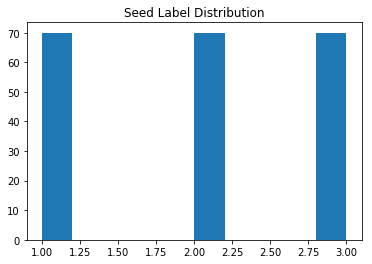

In [4]:
# Check the proporation of data label in 8th column:
sd_label=df.iloc[:,7]
plt.hist(sd_label)
plt.title("Seed Label Distribution")
plt.show()

In [5]:
# Check if there has NA values:
df.isna().any(axis=0)

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
dtype: bool

### 2. Classfication:

#### a. Logistic regression(Multi-class)

In [6]:
# define a function: calcuate average accuracy score based on 10 testing:
def get_score_LG(X, Y):
    score_ls=np.empty(30)
    
    for i in range(30):
        X_train, X_test, Y_train, Y_test = \
        train_test_split(X, Y, test_size=0.3)
        logistic = LogisticRegression(solver='newton-cg',multi_class = "multinomial")
        logistic.fit(X_train,Y_train)
        score_ls[i]=logistic.score(X_test, Y_test)
    
    mean_score=np.mean(score_ls)
    
    return mean_score


In [7]:
### return an accuracy value with 30 tests.
X=df.iloc[:,0:6]
Y=sd_label.astype("int")
get_score_LG(X,Y)

0.9005291005291006

#### *Model Analysis:

In [8]:
# 1. random sample selection:
X=df.iloc[:,0:6]
Y=sd_label.astype("int")
X_train, X_test, Y_train, Y_test = \
train_test_split(X, Y, test_size=0.3, random_state=17)

logistic = LogisticRegression(solver='newton-cg',multi_class = "multinomial")
logistic.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [9]:
### Accuracy score:
accuracy = logistic.score(X_test, Y_test)
accuracy

0.8571428571428571

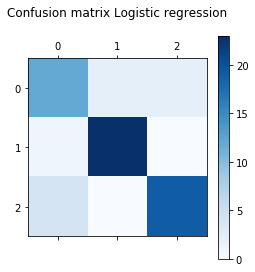

In [10]:
### Confusion matrix
Y_pred=logistic.predict(X_test)
conf=confusion_matrix(Y_test, Y_pred)
conf

plt.matshow(conf, cmap=plt.cm.Blues)
plt.title("Confusion matrix Logistic regression",y=1.2)
plt.colorbar();

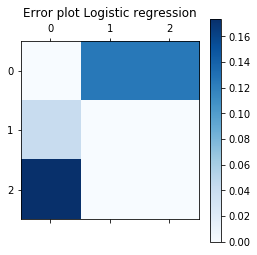

In [11]:
### error plot
row_sums=conf.sum(axis=1, keepdims=True)
norm_conf=conf/row_sums
norm_conf
np.fill_diagonal(norm_conf,0)
plt.matshow(norm_conf, cmap=plt.cm.Blues)
plt.title("Error plot Logistic regression",y=1.1)
plt.colorbar();

#### b. Decision Tree

In [12]:
# define a function: calcuate average accuracy score based on 30 testing:
def get_score_DT(X, Y):
    score_ls=np.empty(30)
    
    for i in range(30):
        X_train, X_test, Y_train, Y_test = \
        train_test_split(X, Y, test_size=0.3)
        tree=DecisionTreeClassifier(max_depth=5)
        tree.fit(X_train,Y_train)
        score_ls[i]=tree.score(X_test, Y_test)
    
    mean_score=np.mean(score_ls)
    
    return mean_score

In [13]:
### return an accuracy value with 30 tests.
X=df.iloc[:,0:6]
Y=sd_label.astype("int")
get_score_DT(X,Y)

0.852910052910053

#### *Model Analysis:

In [14]:
X_train, X_test, Y_train, Y_test = \
train_test_split(X, Y, test_size=0.3, random_state=17)
tree=DecisionTreeClassifier(max_depth=5)
dt=tree.fit(X_train,Y_train)

In [15]:
### Accuracy score
Y_pred=dt.predict(X_test)
accuracy = dt.score(X_test, Y_test)
accuracy

0.8253968253968254

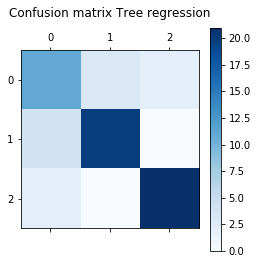

In [16]:
### Confusion matrix
conf=confusion_matrix(Y_test, Y_pred)
conf

plt.matshow(conf, cmap=plt.cm.Blues)
plt.title("Confusion matrix Tree regression",y=1.15)
plt.colorbar();

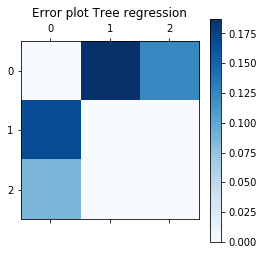

In [17]:
### error plot
row_sums=conf.sum(axis=1, keepdims=True)
norm_conf=conf/row_sums
norm_conf
np.fill_diagonal(norm_conf,0)
plt.matshow(norm_conf, cmap=plt.cm.Blues)
plt.title("Error plot Tree regression",y=1.1)
plt.colorbar();

#### C. Random Forest

In [18]:
# define a function: calcuate average accuracy score based on 30 testing:
def get_score_RF(X, Y):
    score_ls=np.empty(30)
    
    for i in range(30):
        X_train, X_test, Y_train, Y_test = \
        train_test_split(X, Y, test_size=0.3)
        forest = RandomForestClassifier() 
        forest.fit(X_train,Y_train)
        score_ls[i]=forest.score(X_test, Y_test)
    
    mean_score=np.mean(score_ls)
    
    return mean_score

In [19]:
### return an accuracy value with 30 tests.
X=df.iloc[:,0:6]
Y=sd_label.astype("int")
get_score_RF(X,Y)

/Users/Sssiyuan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Sssiyuan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Sssiyuan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Sssiyuan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Sssiyuan/anaconda3/lib/py

0.8714285714285716

#### *Model Analysis:

In [20]:
X_train, X_test, Y_train, Y_test = \
train_test_split(X, Y, test_size=0.3, random_state=17)
forest = RandomForestClassifier(random_state=0) 
rf = forest.fit(X_train,Y_train)

/Users/Sssiyuan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [21]:
### Accuracy score
Y_pred=rf.predict(X_test)
accuracy = rf.score(X_test, Y_test)
accuracy

0.8571428571428571

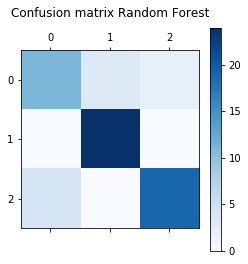

In [22]:
### Confusion matrix
conf=confusion_matrix(Y_test, Y_pred)
conf

plt.matshow(conf, cmap=plt.cm.Blues)
plt.title("Confusion matrix Random Forest",y=1.15)
plt.colorbar();

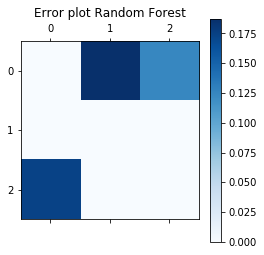

In [23]:
### error plot
row_sums=conf.sum(axis=1, keepdims=True)
norm_conf=conf/row_sums
norm_conf
np.fill_diagonal(norm_conf,0)
plt.matshow(norm_conf, cmap=plt.cm.Blues)
plt.title("Error plot Random Forest",y=1.1)
plt.colorbar();

#### d. Adaboost

In [24]:
# define a function: calcuate average accuracy score based on 30 testing:
def get_score_ADB(X, Y):
    score_ls=np.empty(30)
    
    for i in range(30):
        X_train, X_test, Y_train, Y_test = \
        train_test_split(X, Y, test_size=0.3)
        adaboost = AdaBoostClassifier()
        adaboost.fit(X_train,Y_train)
        score_ls[i]=adaboost.score(X_test, Y_test)
    
    mean_score=np.mean(score_ls)
    
    return mean_score

In [25]:
### return an accuracy value with 30 tests.
X=df.iloc[:,0:6]
Y=sd_label.astype("int")
get_score_ADB(X,Y)

0.7507936507936507

#### *Model Analysis:

In [26]:
X=df.iloc[:,0:6]
Y=sd_label.astype("int")
X_train, X_test, Y_train, Y_test = \
train_test_split(X, Y, test_size=0.3, random_state=17)
adaboost = AdaBoostClassifier(random_state = 0)
adb = adaboost.fit(X_train,Y_train)

In [27]:
### Accuracy score
Y_pred=adb.predict(X_test)
accuracy = adb.score(X_test, Y_test)
accuracy

0.8095238095238095

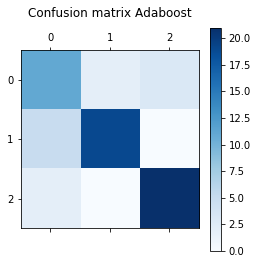

In [28]:
### Confusion matrix
conf=confusion_matrix(Y_test, Y_pred)
conf

plt.matshow(conf, cmap=plt.cm.Blues)
plt.title("Confusion matrix Adaboost",y=1.15)
plt.colorbar();

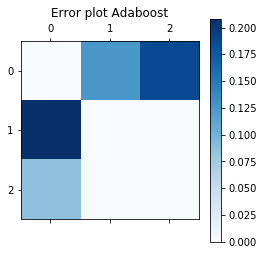

In [29]:
### error plot
row_sums=conf.sum(axis=1, keepdims=True)
norm_conf=conf/row_sums
norm_conf
np.fill_diagonal(norm_conf,0)
plt.matshow(norm_conf, cmap=plt.cm.Blues)
plt.title("Error plot Adaboost",y=1.1)
plt.colorbar();

### 3. GridSearch For Model Optimization

#### *Random Forest

In [30]:
### Perform grid search function
param_grid={'n_estimators':[3, 10, 30, 50], 'max_features':[1,2,3,4]}
rf=RandomForestClassifier()
X_train, X_test, Y_train, Y_test = \
train_test_split(X, Y, test_size=0.3, random_state=17)
grid_search=GridSearchCV(rf, param_grid,scoring='accuracy')
grid_search.fit(X_train, Y_train)

/Users/Sssiyuan/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/Sssiyuan/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [3, 10, 30, 50], 'max_features': [1, 2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [31]:
# Find the best parameter combination
result=pd.DataFrame(grid_search.cv_results_['params'])
result['accuracy']=grid_search.cv_results_['mean_test_score']
result.sort_values('accuracy', ascending=False)

,max_features,n_estimators,accuracy
10,3,30,0.897959
11,3,50,0.897959
7,2,50,0.891156
9,3,10,0.891156
2,1,30,0.884354
3,1,50,0.884354
5,2,10,0.884354
1,1,10,0.877551
15,4,50,0.877551
6,2,30,0.870748


In [32]:
### define a function to recaculate the accuracy scores based in optimized paramters index
def get_score_RF_New(X, Y):
    score_ls=np.empty(30)
    
    for i in range(30):
        X_train, X_test, Y_train, Y_test = \
        train_test_split(X, Y, test_size=0.3)
        forest = RandomForestClassifier(random_state=0,n_estimators=50,max_features=2) 
        forest.fit(X_train,Y_train)
        score_ls[i]=forest.score(X_test, Y_test)
    
    mean_score=np.mean(score_ls)
    
    return mean_score
### return an accuracy value with 30 tests.
X=df.iloc[:,0:6]
Y=sd_label.astype("int")
get_score_RF_New(X,Y)

0.8735449735449736

#### *Decision Tree Regression

In [33]:
### Perform grid search function
param_grid={'max_depth':[3,5,7,10,20,50]}
tree=DecisionTreeClassifier()
X_train, X_test, Y_train, Y_test = \
train_test_split(X, Y, test_size=0.3, random_state=17)
grid_search=GridSearchCV(tree, param_grid,scoring='accuracy')
grid_search.fit(X_train, Y_train)

/Users/Sssiyuan/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/Sssiyuan/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [3, 5, 7, 10, 20, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [34]:
# Find the best parameter combination
result=pd.DataFrame(grid_search.cv_results_['params'])
result['accuracy']=grid_search.cv_results_['mean_test_score']
result.sort_values('accuracy', ascending=False)

,max_depth,accuracy
1,5,0.870748
3,10,0.857143
0,3,0.843537
2,7,0.836735
4,20,0.836735
5,50,0.829932


In [35]:
### define a function to recaculate the accuracy scores based in optimized paramters index
def get_score_DT_New(X, Y):
    score_ls=np.empty(30)
    
    for i in range(30):
        X_train, X_test, Y_train, Y_test = \
        train_test_split(X, Y, test_size=0.3)
        tree=DecisionTreeClassifier(max_depth=7)
        tree.fit(X_train,Y_train)
        score_ls[i]=tree.score(X_test, Y_test)
    
    mean_score=np.mean(score_ls)
    
    return mean_score

### return an accuracy value with 30 tests.
X=df.iloc[:,0:6]
Y=sd_label.astype("int")
get_score_DT_New(X,Y)


0.8507936507936509

### Data analysis two: automobile

In [36]:
df_auto=pd.read_csv("automobile.data", header=None)
df_auto[:15]

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


### 1. Data Exploration:

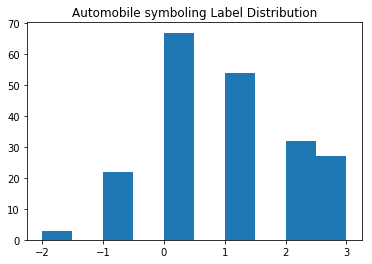

In [37]:
# Check the proporation of data label in 8th column:
auto_label=df_auto.iloc[:,0]

plt.hist(auto_label)
plt.title("Automobile symboling Label Distribution")
plt.show()

In [38]:
auto_label.value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: 0, dtype: int64

#### * Categorical Histograms

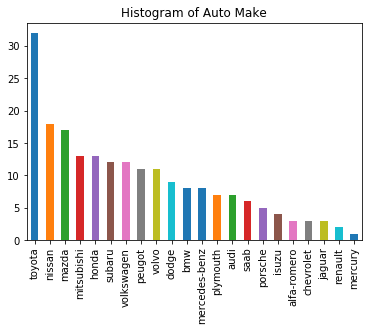

In [39]:
df_auto.iloc[:,2].value_counts().plot(kind='bar',title="Histogram of Auto Make")

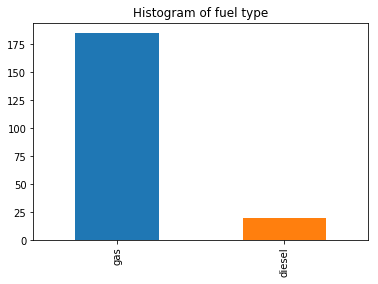

In [40]:
df_auto.iloc[:,3].value_counts().plot(kind='bar',title="Histogram of fuel type")

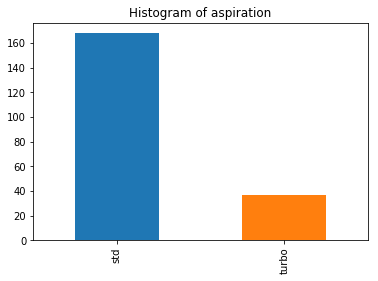

In [41]:
df_auto.iloc[:,4].value_counts().plot(kind='bar',title="Histogram of aspiration")

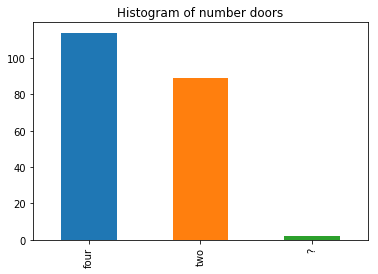

In [42]:
df_auto.iloc[:,5].value_counts().plot(kind='bar',title="Histogram of number doors")

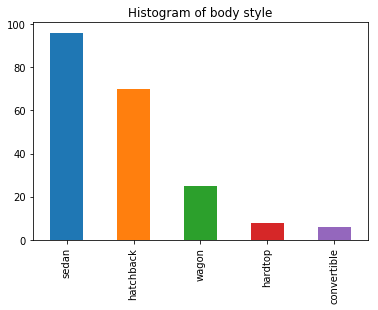

In [43]:
df_auto.iloc[:,6].value_counts().plot(kind='bar',title="Histogram of body style")

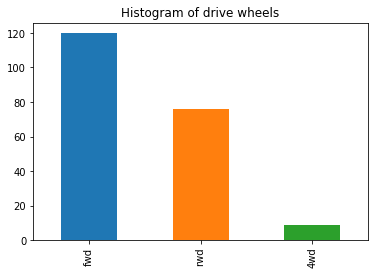

In [44]:
df_auto.iloc[:,7].value_counts().plot(kind='bar',title="Histogram of drive wheels")

#### *Data Cleaning

In [45]:
# Check if there has NA values:
df_auto=df_auto.replace({'?': np.NaN})
df_cp=df_auto

# Clean the dataset without NaN rows
df_cp=df_cp.dropna()
df_cp=df_cp.reset_index(drop=True)
df_cp[:10]

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
1,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
2,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
3,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
4,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430
5,0,192,bmw,gas,std,four,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16925
6,0,188,bmw,gas,std,two,sedan,rwd,front,101.2,...,164,mpfi,3.31,3.19,9.0,121,4250,21,28,20970
7,0,188,bmw,gas,std,four,sedan,rwd,front,101.2,...,164,mpfi,3.31,3.19,9.0,121,4250,21,28,21105
8,2,121,chevrolet,gas,std,two,hatchback,fwd,front,88.4,...,61,2bbl,2.91,3.03,9.5,48,5100,47,53,5151
9,1,98,chevrolet,gas,std,two,hatchback,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70,5400,38,43,6295


### 2. Classfication:

In [46]:
### Define X and Y matrix for classfication model fit
X=df_cp.iloc[:,1:26]
Y=df_cp.iloc[:,0].astype("int")
labelencoder= LabelEncoder()

# tranform Categorical data into numerical form
X.iloc[:,1] = labelencoder.fit_transform(X.iloc[:,1])
X.iloc[:,2] = labelencoder.fit_transform(X.iloc[:,2])
X.iloc[:,3] = labelencoder.fit_transform(X.iloc[:,3])
X.iloc[:,4] = labelencoder.fit_transform(X.iloc[:,4])
X.iloc[:,5] = labelencoder.fit_transform(X.iloc[:,5])
X.iloc[:,6] = labelencoder.fit_transform(X.iloc[:,6])
X.iloc[:,7] = labelencoder.fit_transform(X.iloc[:,7])
X.iloc[:,13] = labelencoder.fit_transform(X.iloc[:,13])
X.iloc[:,14] = labelencoder.fit_transform(X.iloc[:,14])
X.iloc[:,16] = labelencoder.fit_transform(X.iloc[:,16])

# change other object into numerical form
X.astype("float")

,1,2,3,4,5,6,7,8,9,10,...,16,17,18,19,20,21,22,23,24,25
0,164.0,0.0,1.0,0.0,0.0,3.0,1.0,0.0,99.8,176.6,...,109.0,4.0,3.19,3.40,10.00,102.0,5500.0,24.0,30.0,13950.0
1,164.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,99.4,176.6,...,136.0,4.0,3.19,3.40,8.00,115.0,5500.0,18.0,22.0,17450.0
2,158.0,0.0,1.0,0.0,0.0,3.0,1.0,0.0,105.8,192.7,...,136.0,4.0,3.19,3.40,8.50,110.0,5500.0,19.0,25.0,17710.0
3,158.0,0.0,1.0,1.0,0.0,3.0,1.0,0.0,105.8,192.7,...,131.0,4.0,3.13,3.40,8.30,140.0,5500.0,17.0,20.0,23875.0
4,192.0,1.0,1.0,0.0,1.0,3.0,2.0,0.0,101.2,176.8,...,108.0,4.0,3.50,2.80,8.80,101.0,5800.0,23.0,29.0,16430.0
5,192.0,1.0,1.0,0.0,0.0,3.0,2.0,0.0,101.2,176.8,...,108.0,4.0,3.50,2.80,8.80,101.0,5800.0,23.0,29.0,16925.0
6,188.0,1.0,1.0,0.0,1.0,3.0,2.0,0.0,101.2,176.8,...,164.0,4.0,3.31,3.19,9.00,121.0,4250.0,21.0,28.0,20970.0
7,188.0,1.0,1.0,0.0,0.0,3.0,2.0,0.0,101.2,176.8,...,164.0,4.0,3.31,3.19,9.00,121.0,4250.0,21.0,28.0,21105.0
8,121.0,2.0,1.0,0.0,1.0,2.0,1.0,0.0,88.4,141.1,...,61.0,1.0,2.91,3.03,9.50,48.0,5100.0,47.0,53.0,5151.0
9,98.0,2.0,1.0,0.0,1.0,2.0,1.0,0.0,94.5,155.9,...,90.0,1.0,3.03,3.11,9.60,70.0,5400.0,38.0,43.0,6295.0


#### a. Logistics Regression

In [47]:
### define a function to caucalte avaerage accuracy scores based on 30 model tests
def get_score_LG(X, Y):
    score_ls=np.empty(30)
    
    for i in range(30):
        X_train, X_test, Y_train, Y_test = \
        train_test_split(X, Y, test_size=0.3)
        logistic = LogisticRegression(solver='newton-cg',multi_class = "multinomial")
        logistic.fit(X_train,Y_train)
        score_ls[i]=logistic.score(X_test, Y_test)
    
    mean_score=np.mean(score_ls)
    
    return mean_score

In [48]:
get_score_LG(X,Y)

/Users/Sssiyuan/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/Users/Sssiyuan/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/Users/Sssiyuan/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/Users/Sssiyuan/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/Users/Sssiyuan/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converg

0.6097222222222223

#### b. Random Forest

In [49]:
### define a function to caucalte avaerage accuracy scores based on 30 model tests
def get_score_RF(X, Y):
    score_ls=np.empty(30)
    
    for i in range(30):
        X_train, X_test, Y_train, Y_test = \
        train_test_split(X, Y, test_size=0.3)
        forest = RandomForestClassifier() 
        forest.fit(X_train,Y_train)
        score_ls[i]=forest.score(X_test, Y_test)
    
    mean_score=np.mean(score_ls)
    
    return mean_score
### return an accuracy value with 30 tests.
get_score_RF(X,Y)

/Users/Sssiyuan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Sssiyuan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Sssiyuan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Sssiyuan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Sssiyuan/anaconda3/lib/py

0.7618055555555557

#### C. Decision Tree Regression

In [50]:
### define a function to caucalte avaerage accuracy scores based on 30 model tests
def get_score_DT(X, Y):
    score_ls=np.empty(30)
    
    for i in range(30):
        X_train, X_test, Y_train, Y_test = \
        train_test_split(X, Y, test_size=0.3)
        tree=DecisionTreeClassifier()
        tree.fit(X_train,Y_train)
        score_ls[i]=tree.score(X_test, Y_test)
    
    mean_score=np.mean(score_ls)
    
    return mean_score

### return an accuracy value with 30 tests.
get_score_DT_New(X,Y)


0.7895833333333335

### Model Analysis: (Random Forest and Decisition Tree Regression)

#### *Confusion Matrix & Error Matrix (DTR)

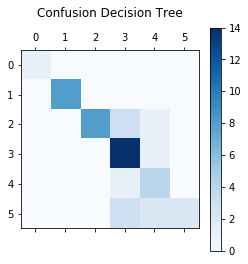

In [51]:
### Confusion Matx
X_train, X_test, Y_train, Y_test = \
train_test_split(X, Y, test_size=0.3, random_state=177)
tree=DecisionTreeClassifier()
tree.fit(X_train,Y_train)

Y_pred=tree.predict(X_test)
conf=confusion_matrix(Y_test, Y_pred)
conf

plt.matshow(conf, cmap=plt.cm.Blues)
plt.title("Confusion Decision Tree",y=1.15)
plt.colorbar();

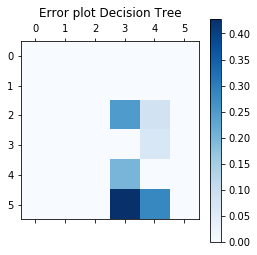

In [52]:
### Error matx
row_sums=conf.sum(axis=1, keepdims=True)
norm_conf=conf/row_sums
norm_conf
np.fill_diagonal(norm_conf,0)
plt.matshow(norm_conf, cmap=plt.cm.Blues)
plt.title("Error plot Decision Tree",y=1.1)
plt.colorbar();

#### *Confusion Matrix & Error Matrix (RF)

/Users/Sssiyuan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


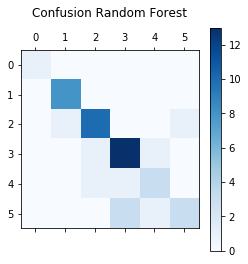

In [53]:
### Confusion Matx
X_train, X_test, Y_train, Y_test = \
train_test_split(X, Y, test_size=0.3, random_state=177)
forest = RandomForestClassifier() 
forest.fit(X_train,Y_train)

Y_pred=forest.predict(X_test)
conf=confusion_matrix(Y_test, Y_pred)
conf

plt.matshow(conf, cmap=plt.cm.Blues)
plt.title("Confusion Random Forest",y=1.15)
plt.colorbar();

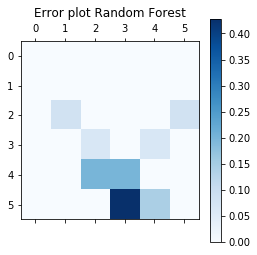

In [54]:
### Error matx
row_sums=conf.sum(axis=1, keepdims=True)
norm_conf=conf/row_sums
norm_conf
np.fill_diagonal(norm_conf,0)
plt.matshow(norm_conf, cmap=plt.cm.Blues)
plt.title("Error plot Random Forest",y=1.1)
plt.colorbar();

### 3. Random search for Optimized Parameter

#### One Fixed Sample

In [55]:
### Perform random seach function to find optimzed parameters 
param_grid={'n_estimators':[3, 10, 30, 50], 'max_features':[1,2,3,4,5]}
rf=RandomForestClassifier()
X_train, X_test, Y_train, Y_test = \
train_test_split(X, Y, test_size=0.3, random_state=177)
rd_search=RandomizedSearchCV(rf, param_grid,scoring='accuracy')
rd_search.fit(X_train, Y_train)

/Users/Sssiyuan/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/Sssiyuan/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
/Users/Sssiyuan/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'n_estimators': [3, 10, 30, 50], 'max_features': [1, 2, 3, 4, 5]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='accuracy', verbose=0)

In [56]:
# Find the best parameter combination
result=pd.DataFrame(rd_search.cv_results_['params'])
result['accuracy']=rd_search.cv_results_['mean_test_score']
result.sort_values('accuracy', ascending=False)

,max_features,n_estimators,accuracy
2,5,50,0.720721
9,5,30,0.702703
1,1,50,0.684685
4,2,30,0.675676
8,3,10,0.675676
7,4,50,0.666667
0,3,30,0.648649
3,1,10,0.648649
5,5,10,0.639640
6,4,3,0.621622


#### 30 Sample Model test

In [57]:
def get_score_RF_FL(X, Y):
    score_ls=np.empty(30)
    
    for i in range(30):
        X_train, X_test, Y_train, Y_test = \
        train_test_split(X, Y, test_size=0.3)
        forest = RandomForestClassifier(max_features=3,n_estimators=50) 
        forest.fit(X_train,Y_train)
        score_ls[i]=forest.score(X_test, Y_test)
    
    mean_score=np.mean(score_ls)
    
    return mean_score
### return an accuracy value with 30 tests.
get_score_RF_FL(X,Y)

0.8048611111111111